# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import scipy.stats as ss
from scipy.stats import mode
df = pd.read_csv('data/human_body_temperature.csv')

### 1. Is the distribution of body temperatures normal?

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


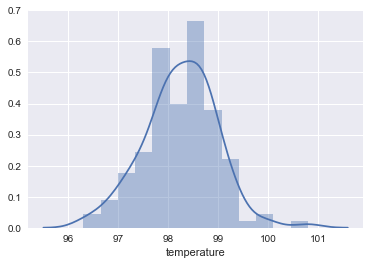

In [71]:
sns.distplot(df.temperature)


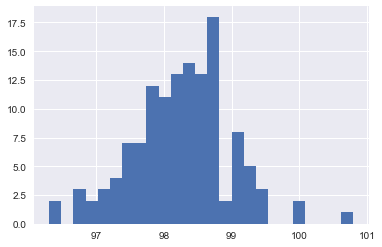

In [72]:
plt.hist(df.temperature, bins=25)
plt.show()

In [73]:
print('Mean:', df.temperature.mean())
print('Median:', df.temperature.median())
print('Mode:', mode(df.temperature))

Mean: 98.24923076923078
Median: 98.3
Mode: ModeResult(mode=array([ 98.]), count=array([11]))


The mean of the temperature distributions above centers around 98.3. The distribution is dense in the center and less dense at either tails. Additionally, the mean, median and mode are nearly identical.

### Is the sample size large? Are the observations independent?

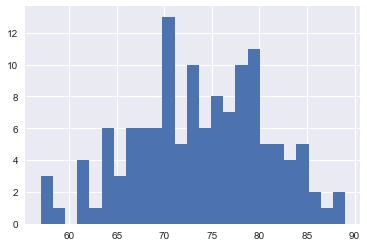

In [74]:
plt.hist(df.heart_rate, bins=25)
plt.show()

The sample size is 130 which is much larger than 30 observations needed to invoke CLT. The heart rates across the sample of individuals is very different, leading us to believe that the observations are independent.

### 3. Is the true population mean really 98.6 degrees F?
<ul>
<li> Would you use a one-sample or two-sample test? Why? </li>
<li> In this situation, is it appropriate to use the t or  z statistic? </li>
<li> Now try using the other test. How is the result be different? Why? </li>
</ul>

To determine the mean, I would use a two sample test. This is because we only care if temp is not equal to 98.6. We dont care if it is less or more.

I will use the Z statistic as the sample size is big enough to warrant its use

H0: μ = 98.6 <br>
H1: μ <> 98.6

In [75]:
sample_mean = df.temperature.mean()
sample_sd = df.temperature.std()
n =130
se = sample_sd/np.sqrt(n)

In [76]:
z = (sample_mean - 98.6)/se

In [77]:
z

-5.4548232923640789

In [78]:
ss.norm.cdf(z)

2.4510785070566898e-08

Since the p-value is < 0.00001 which means that the result is significant at p < 0.05, and we reject the null hypothesis. <break> Therefore, we can conclude that <strong> the population mean is not 98.6 </strong>

In [81]:
temp = df.filter(['temperature'], axis=1)

In [84]:
one_sample = ss.ttest_1samp(temp, 98.6)

In [88]:
one_sample
print ("The t-statistic is %.3f and the p-value is %.3f." % one_sample)

The t-statistic is -5.455 and the p-value is 0.000.


This result is also statistically significant. This reiterates that the population mean is different from 98.6 F

### 4. At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

For 95% confidence, z value is 1.96

In [89]:
confidence_interval = (sample_mean - 1.96*se, sample_mean + 1.96*se)

In [91]:
confidence_interval

(98.123194112228518, 98.375267426233037)

Any temperatures < 98.12 or > 98.37 will be considered abnormal

### 5. Is there a significant difference between males and females in normal temperature?
<ul>
    <li> What test did you use and why? </li>
    <li> Write a story with your conclusion in the context of the original problem.</li>
 </ul>

To compare two means, I will be using a two-sample t-test

H0: μ1 = μ2 <br>
Ha: μ1 ≠ μ2

In [141]:
male_temp = df[(df.gender == 'M')]
female_temp = df[(df.gender == 'F')]

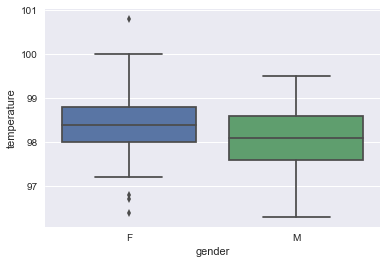

In [143]:
sns.boxplot(x="gender", y="temperature", data=df)

<strong> Visually, we can see that the temperatures are different between males and females. </strong>

In [133]:
male_temp = male_temp.filter(['temperature'], axis=1)
female_temp = female_temp.filter(['temperature'], axis=1)
male_var=male_temp.var()
female_var=female_temp.var()

In [145]:
print ('Male Temp variance:' , male_var.values)
print ('Female Temp variance:' , female_var.values)

Male Temp variance: [ 0.48825962]
Female Temp variance: [ 0.55277404]


In [122]:
two_sample_diff_var = ss.ttest_ind(male_temp, female_temp, equal_var=False)

print ("If we assume unequal variances than the t-statistic is %.3f and the p-value is %.3f." % two_sample_diff_var)

If we assume unequal variances than the t-statistic is -2.285 and the p-value is 0.024.


Since the p-value < 0.05 we can conclude that the populations means of females and males are significantly different.

<strong> Summary: </strong>
<ul>
<li> Overall body temperatures are significantly different from the mean of 98.6 F. </li>
<li> Overall body temperatures are also different for females and males, with females being slightly warmer than males </li>
</ul>